In [1]:
from konlpy.tag import Okt
from konlpy.tag import Kkma
from kiwipiepy import Kiwi
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image 
import re
from collections import Counter
from emoji import core
import ast
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv(
    "../data/saramin_merge_sections_tokeni.csv"
)

df

keyword                                  title   company location  \
0    AI 에이전트       [AI기반 특허 데이터분석 플랫폼 기업] 프론트엔드 개발자     에이피써치   서울 강남구   
1    AI 에이전트  [자율주행] AI Engineer / 3D Auto-labeling   (주)비저너리   서울 강남구   
2    AI 에이전트    [로봇 솔루션기업] 모바일로봇 교통 관제 시스템 설계 및 개발자  (주)맨토스파워   서울 마포구   
3    AI 에이전트  Microsoft 365 Copilot 및 Agent 개발 컨설턴트   (주)무늬랩스   서울 송파구   
4    AI 에이전트     35. AI Platform Engineer [대기업 게임사]  베스트네트워크㈜   서울 강남구   
..       ...                                    ...       ...      ...   
464  AI 에이전트            정부사업/국책과제 담당 인턴 (정규직 전환 가능)     (주)코딧  서울 영등포구   
465  AI 에이전트                    B2B 서비스 기획 담당자 (PO)     (주)코딧  서울 영등포구   
466  AI 에이전트                          정부사업/국책과제 담당자     (주)코딧  서울 영등포구   
467  AI 에이전트                                마케팅 매니저     (주)코딧  서울 영등포구   
468  AI 에이전트                      QA 인턴 (정규직 전환 가능)     (주)코딧  서울 영등포구   

       career education work_type    deadline  \
0    경력 7~15년       대졸↑       정규직         채용시   
1        경력무관       석사↑       정규직         채용시   
2       경력2년↑       대졸↑       정규직  ~ 02/17(화)   
3       경력2년↑      초대졸↑       정규직  ~ 03/04(수)   
4       경력2년↑       대졸↑       정규직  ~ 02/17(화)   
..        ...       ...       ...         ...   
464      경력무관       대졸↑       인턴직         채용시   
465  경력 3~10년       대졸↑       정규직         채용시   
466   경력 3~8년       대졸↑       정규직         채용시   
467  경력 2~10년       대졸↑       정규직         채용시   
468      경력무관      학력무관       인턴직         채용시   

                                                  link   rec_idx  ...  \
0    https://www.saramin.co.kr/zf_user/jobs/relay/v...  52982351  ...   
1    https://www.saramin.co.kr/zf_user/jobs/relay/v...  52981267  ...   
2    https://www.saramin.co.kr/zf_user/jobs/relay/v...  52980063  ...   
3    https://www.saramin.co.kr/zf_user/jobs/relay/v...  52979929  ...   
4    https://www.saramin.co.kr/zf_user/jobs/relay/v...  52979323  ...   
..                                                 ...       ...  ...   
464  https://www.saramin.co.kr/zf_user/jobs/relay/v...  47944456  ...   
465  https://www.saramin.co.kr/zf_user/jobs/relay/v...  47906939  ...   
466  https://www.saramin.co.kr/zf_user/jobs/relay/v...  47893642  ...   
467  https://www.saramin.co.kr/zf_user/jobs/relay/v...  47849094  ...   
468  https://www.saramin.co.kr/zf_user/jobs/relay/v...  47609360  ...   

                                       preferred_quali  \
0    - TypeScript에 대한 경험과 이해가 깊은 분\n- 대규모 프로젝트나 복잡한...   
1    Autolabeling / weak supervision / active learn...   
2                                               📋 우대사항   
3    - Copilot Studio (Builder), Power Automate, Po...   
4    - LangChain, OpenAI API 등 LLM 활용 경험\n- Tool Ca...   
..                                                 ...   
464                                                NaN   
465                                                NaN   
466                                                NaN   
467                                                NaN   
468                                                NaN   

                                        hiring_process  \
0    - 국문 이력서 및 경력기술서 (Word로 하나의 파일로 작성)\n- 이력서 제출시...   
1    지원서 접수 → (선택) 커피챗 → 기술 인터뷰 → 필요 시 추가 인터뷰(컬처/오프...   
2    2026-02-02 10시 ~ 2026-02-17 24시\n사람인 온라인 이력서\n...   
3    서류전형 → 1차면접 (부문 리더) → 2차면접 (대표이사) → 최종합격\n- 이력...   
4     사람인 온라인 이력서\n사람인 입사지원\n서류전형 → 1차면접 → 2차면접 → 최종합격   
..                                                 ...   
464  https://www.mk.co.kr/news/society/view/2021/05...   
465  https://www.mk.co.kr/news/society/view/2021/05...   
466  https://www.mk.co.kr/news/society/view/2021/05...   
467  https://www.mk.co.kr/news/society/view/2021/05...   
468  https://www.mk.co.kr/news/society/view/2021/05...   

                                              benefits  \
0                                         - 고용형태 : 정규직   
1    Daily scrum으로 개발 우선순위 결정, 서로 피드백\n코드 리뷰를 통해 더 ...   
2    모바일로봇 교통 관제 시스템 설계 및 개발 경력직 채용\n모바일로봇 교통 관제 시스...   
3    - 고용형태 : 정규직\n주 5일,

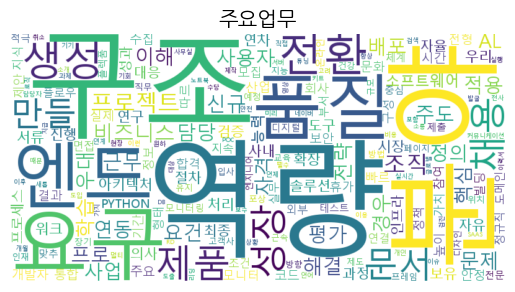

In [ ]:
#주요업무 키워드 분석
result_list = []
remove_list =[]
remove_list0 = ['AI',' AL','AGENT','에이전트','위하','이상','또는']
remove_list1 = ['운영','설계','개발','기반']
remove_list2 = ['구축', '서비스', '데이터', '업무','기술','시스템']
remove_list3 = ['LLM','분석','관리','경험','개선','지원','환경','활용']
remove_list4 = ['최적','모델','가능','구현','기획']
remove_list5 = ['사항','사용','통하','고객']
remove_list6 = ['제공','함께','다양','협업','자동']
remove_list7 = ['파이프라인','RAG','성능','필요','기능','API']
remove_list8 = ['기업','수행','수립']
remove_list9 = ['최신','고도','플랫폼','작성','관련']
remove_list10 = ['결정','효율','경력','대하']
remove_list11 = []
remove_list12 = []
remove_list13 = []
remove_list14 = []
remove_list15 = []
remove_list.extend(remove_list0)
remove_list.extend(remove_list1)
remove_list.extend(remove_list2)
remove_list.extend(remove_list3)
remove_list.extend(remove_list4)
remove_list.extend(remove_list5)
remove_list.extend(remove_list6)
remove_list.extend(remove_list7)
remove_list.extend(remove_list8)
remove_list.extend(remove_list9)
remove_list.extend(remove_list10)
remove_list.extend(remove_list11)
remove_list.extend(remove_list12)
remove_list.extend(remove_list13)
remove_list.extend(remove_list14)
remove_list.extend(remove_list15)

for respons_text in df["respons_text"]:
    if pd.isna(respons_text):
        continue
    respons_list = ast.literal_eval(respons_text)
    data_list = []
    for respons_text in respons_list:
        respons_text = respons_text.upper() #대문자화
        if respons_text in remove_list:
            continue
        data_list.append(respons_text)
    data_list = list(set(data_list)) # 중복제거
    result_list.extend(data_list)

counter = Counter(result_list)

wc = WordCloud(
    font_path = r"c:\Windows\Fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.Figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("주요업무", fontsize=15)
plt.show()

In [159]:
#네트워크 분석을 위한 데이터 만들기
te = TransactionEncoder()

remove_list = ['위하','AL','AI','AGENT','설계','개발','기반']    #불필요한 단어리스트
result_list = []    #불필요한 단어 제거된 결과

for respons_text in df["respons_text"]:
    if pd.isna(respons_text):
        continue
    respons_list = ast.literal_eval(respons_text)

    data_list = []
    for respons_text in respons_list:
        respons_text = respons_text.upper() #대문자화
        if respons_text in remove_list:
            continue
        data_list.append(respons_text)
    data_list = list(set(data_list)) # 중복제거
    result_list.append(data_list)   

te_arr = te.fit(result_list).transform(result_list)

df_arr = pd.DataFrame(te_arr, columns=te.columns_)

frequent_itemsets = apriori(df_arr, min_support=0.003, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.1)


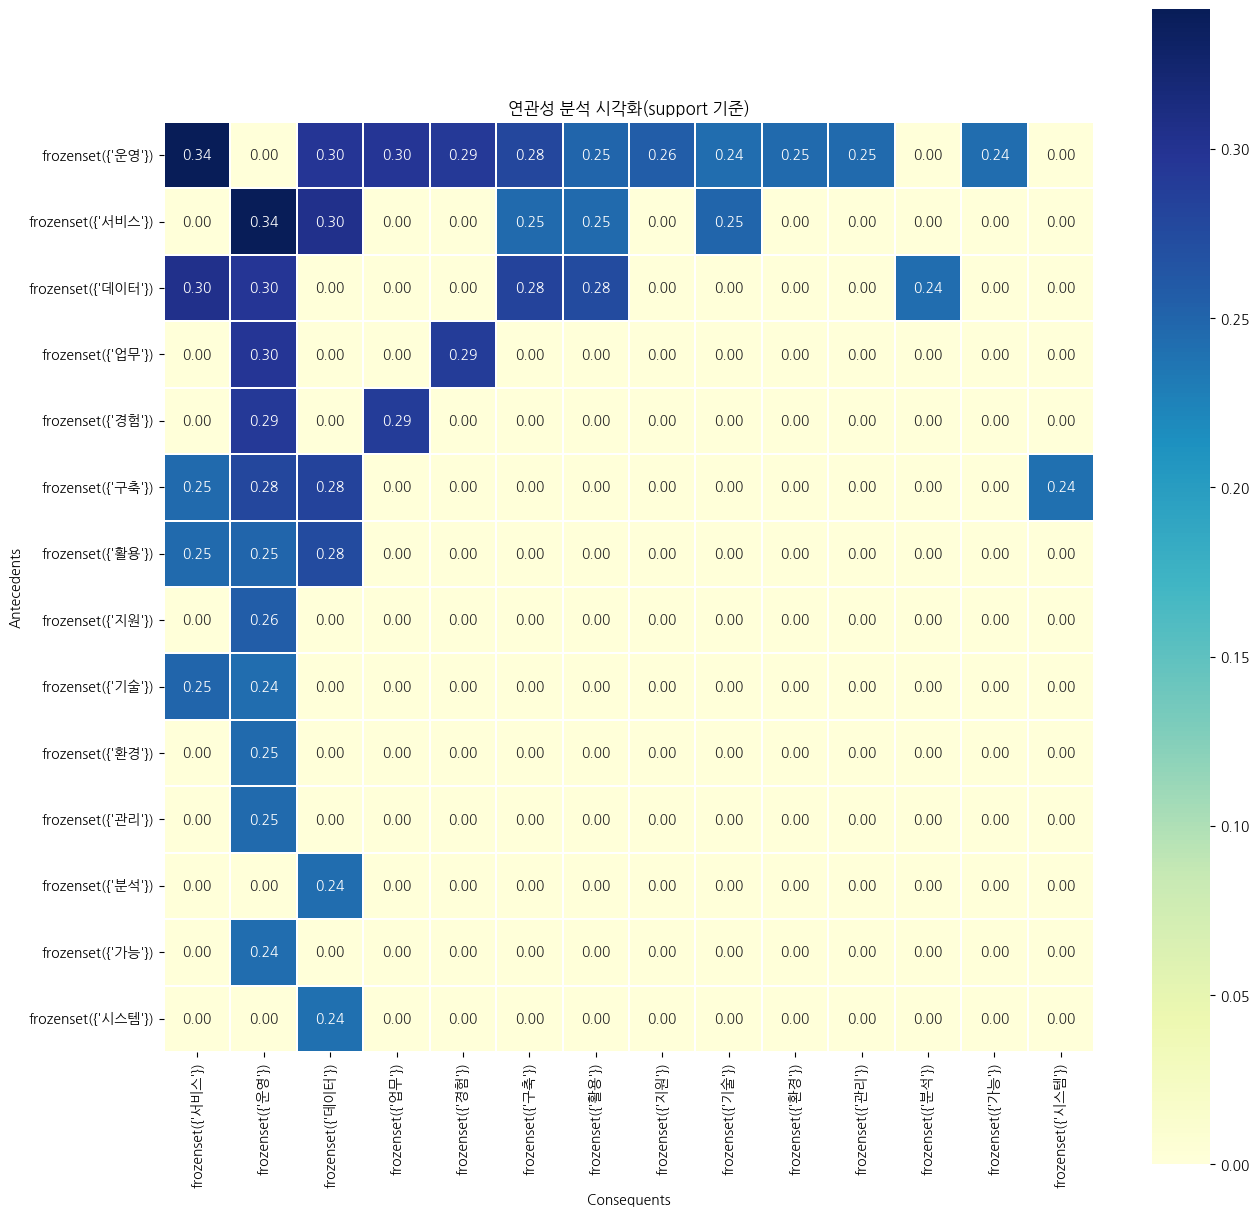

In [160]:
# 히트맵 그리기
pivot_data = rules.sort_values("support", ascending=False).head(40).pivot_table(
    index="antecedents",
    columns="consequents",
    values="support",
    fill_value=0
)
plt.figure(figsize=(15,15))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(support 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

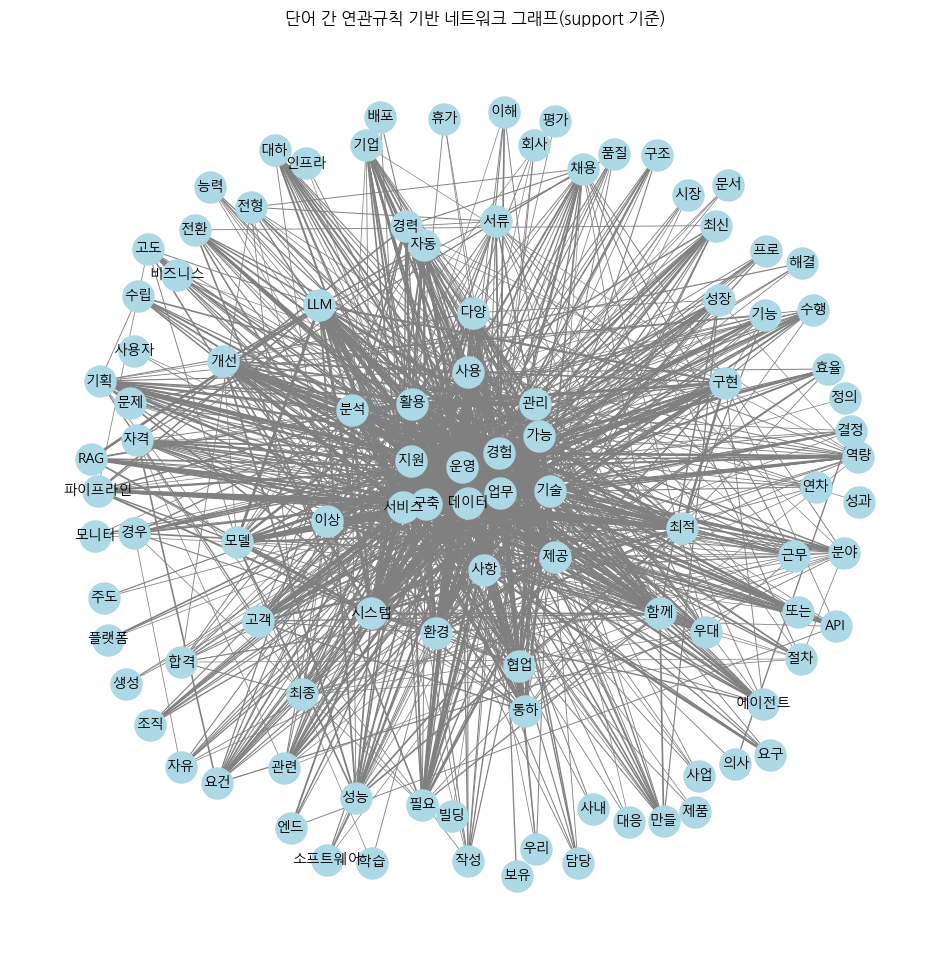

In [161]:
#네트워크 그래프 그리기
# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
## 보여주고 싶은 데이터 설정하기
my_rules = rules.sort_values(by=["support"], ascending=False)

for _ , col_data in my_rules.iterrows():
    # 1) 단어 추출
    antecedent = ",".join(col_data["antecedents"])
    consequent = ",".join(col_data["consequents"])

    # 2) 지표 추출
    weight = col_data["support"]

    # 3) 그래프에 정보 추가
    G.add_edge(antecedent, consequent, weight=weight)

# 3. 노드 배치
# position = nx.kamada_kawai_layout(G)
position = nx.spring_layout(G, k=1.0, seed=1)

# 4. 가중치 추출
scale = 1 # 선의 굵기가 너무 굵다면 사이즈를 줄일수 있습니다
edge_weights = [G[u][v]["weight"]*scale for u, v in G.edges()]
w = np.array(edge_weights, dtype=float)
w_norm = (w - w.min()) / (w.max() - w.min() + 1e-9)   # 0~1
w_scaled  = 0.5 + w_norm * 5

# 5. 그리기
plt.figure(figsize=(12,12))
nx.draw_networkx_nodes(G, position, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, position, edge_color="gray", width=w_scaled)
nx.draw_networkx_labels(G, position, font_size=10, font_family="Malgun Gothic")
plt.title("단어 간 연관규칙 기반 네트워크 그래프(support 기준)")
plt.axis("off")
plt.show()

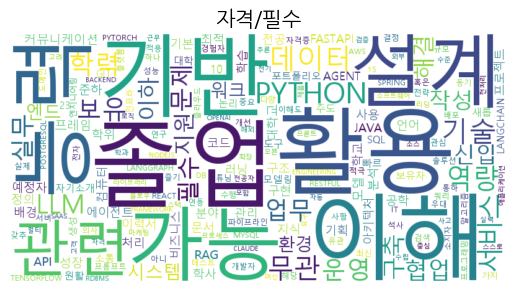

In [130]:
#자격/필수 키워드 분석
remove_list = ['AI',' AL',' AGENT','위하','이상','또는','경력','경험','개발','대하']    #불필요한 단어리스트
result_list = []    #불필요한 단어 제거된 결과

for respons_text in df["qualifi_text"]:
    if pd.isna(respons_text):
        continue
    respons_list = ast.literal_eval(respons_text)

    data_list = []
    for respons_text in respons_list:
        respons_text = respons_text.upper() #대문자화
        if respons_text in remove_list:
            continue
        data_list.append(respons_text)
    data_list = list(set(data_list)) # 중복제거
    result_list.extend(data_list)

counter = Counter(result_list)

wc = WordCloud(
    font_path = r"c:\Windows\Fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.Figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("자격/필수", fontsize=15)
plt.show()

In [131]:
#네트워크 분석을 위한 데이터 만들기
te = TransactionEncoder()

remove_list = ['AI',' AL',' AGENT','위하','이상','또는','경력','경험','개발','대하']    #불필요한 단어리스트
result_list = []    #불필요한 단어 제거된 결과

for respons_text in df["qualifi_text"]:
    if pd.isna(respons_text):
        continue
    respons_list = ast.literal_eval(respons_text)

    data_list = []
    for respons_text in respons_list:
        respons_text = respons_text.upper() #대문자화
        if respons_text in remove_list:
            continue
        data_list.append(respons_text)
    data_list = list(set(data_list)) # 중복제거
    result_list.append(data_list)   

te_arr = te.fit(result_list).transform(result_list)

df_arr = pd.DataFrame(te_arr, columns=te.columns_)

frequent_itemsets = apriori(df_arr, min_support=0.003, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.1)

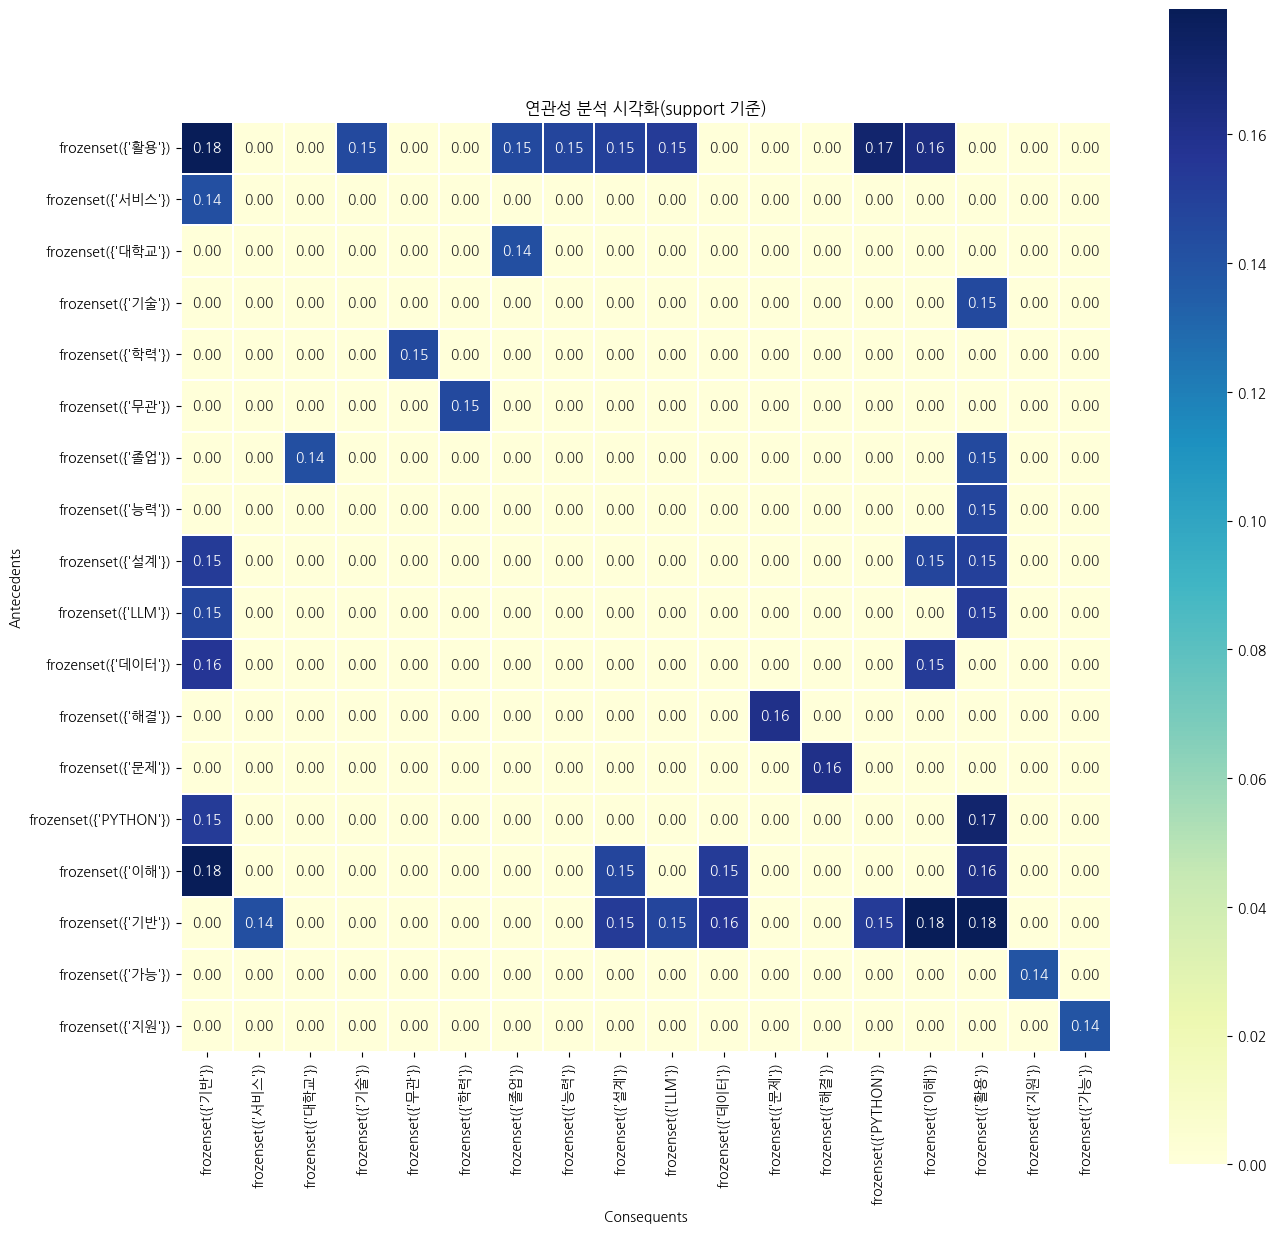

In [132]:
# 히트맵 그리기
pivot_data = rules.sort_values("support", ascending=False).head(40).pivot_table(
    index="antecedents",
    columns="consequents",
    values="support",
    fill_value=0
)
plt.figure(figsize=(15,15))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(support 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

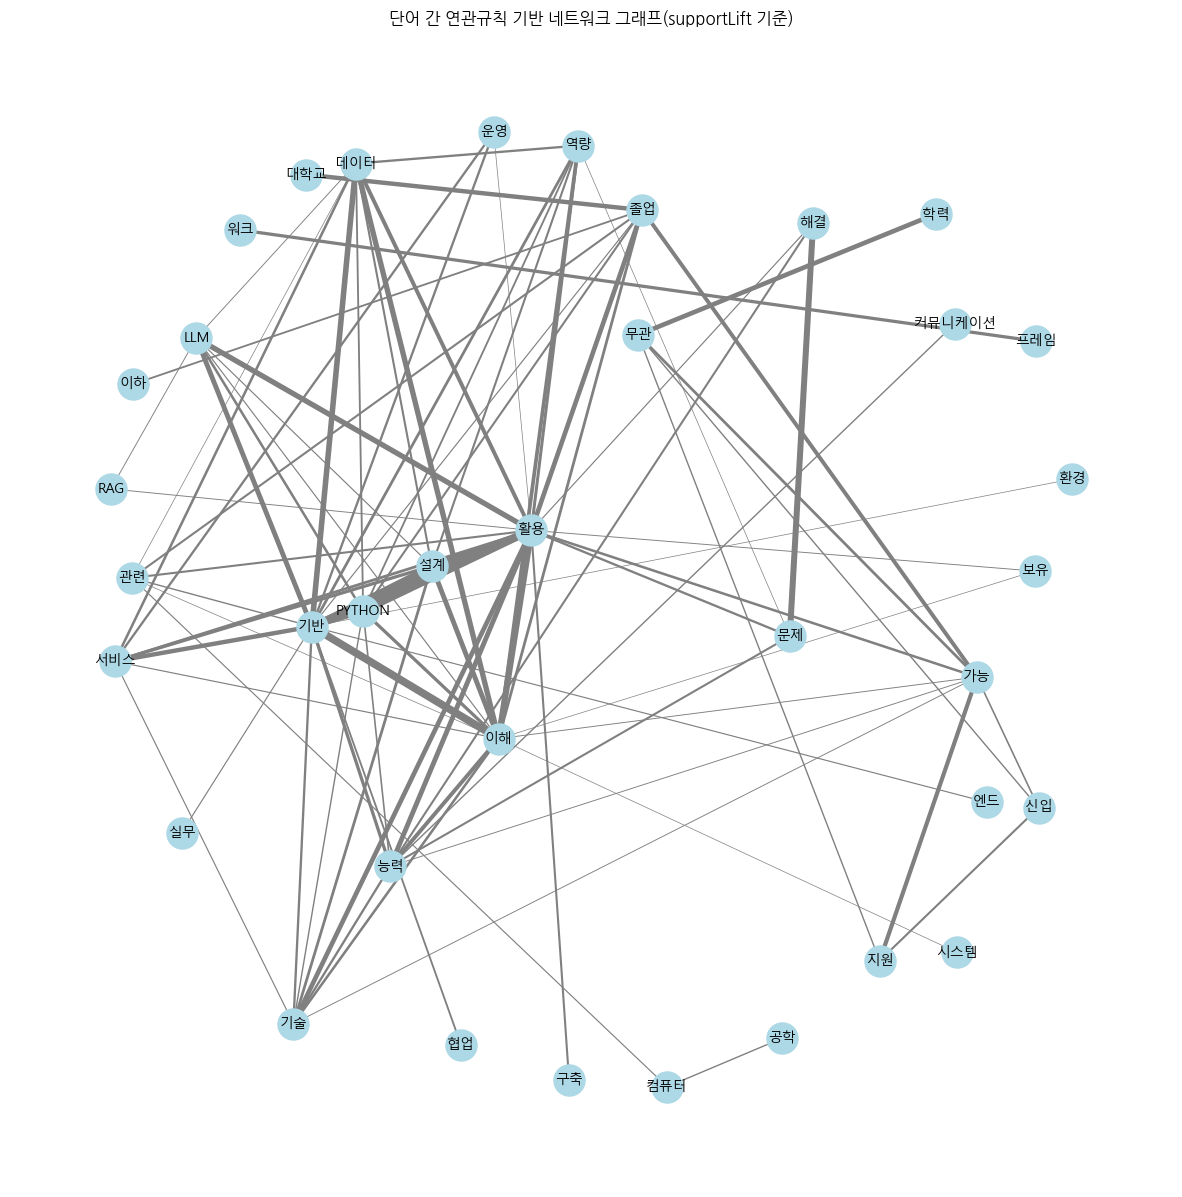

In [139]:
#네트워크 그래프 그리기
# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
## 보여주고 싶은 데이터 설정하기
my_rules = rules.sort_values(by=["support"], ascending=False)

for _ , col_data in my_rules.iterrows():
    # 1) 단어 추출
    antecedent = ",".join(col_data["antecedents"])
    consequent = ",".join(col_data["consequents"])

    # 2) 지표 추출
    weight = col_data["support"]

    # 3) 그래프에 정보 추가
    G.add_edge(antecedent, consequent, weight=weight)

# 3. 노드 배치
# position = nx.kamada_kawai_layout(G)
position = nx.spring_layout(G, k=1.0, seed=1)

# 4. 가중치 추출
scale = 1 # 선의 굵기가 너무 굵다면 사이즈를 줄일수 있습니다
edge_weights = [G[u][v]["weight"]*scale for u, v in G.edges()]
w = np.array(edge_weights, dtype=float)
w_norm = (w - w.min()) / (w.max() - w.min() + 1e-9)   # 0~1
w_scaled  = 0.5 + w_norm * 5

# 5. 그리기
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, position, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, position, edge_color="gray", width=w_scaled)
nx.draw_networkx_labels(G, position, font_size=10, font_family="Malgun Gothic")
plt.title("단어 간 연관규칙 기반 네트워크 그래프(supportLift 기준)")
plt.axis("off")
plt.show()

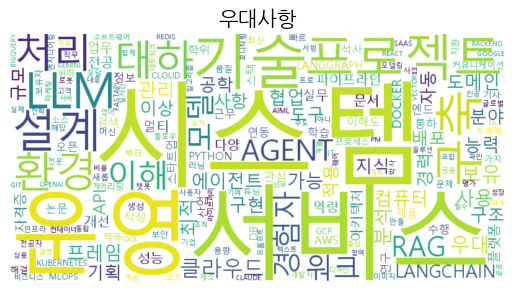

In [96]:
#우대사항 키워드 분석
remove_list = ['경험','또는','개발','관련','기반','AI','활용','데이터']    #불필요한 단어리스트
result_list = []    #불필요한 단어 제거된 결과

for respons_text in df["preferred_text"]:
    if pd.isna(respons_text):
        continue
    respons_list = ast.literal_eval(respons_text)

    data_list = []
    for respons_text in respons_list:
        respons_text = respons_text.upper() #대문자화
        if respons_text in remove_list:
            continue
        data_list.append(respons_text)
    data_list = list(set(data_list)) # 중복제거
    result_list.extend(data_list)   

counter = Counter(result_list)

wc = WordCloud(
    font_path = r"c:\Windows\Fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.Figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("우대사항", fontsize=15)
plt.show()

In [144]:
#네트워크 분석을 위한 데이터 만들기
te = TransactionEncoder()

remove_list = []    #불필요한 단어리스트
result_list = []    #불필요한 단어 제거된 결과

for respons_text in df["preferred_text"]:
    if pd.isna(respons_text):
        continue
    respons_list = ast.literal_eval(respons_text)

    data_list = []
    for respons_text in respons_list:
        respons_text = respons_text.upper() #대문자화
        if respons_text in remove_list:
            continue
        data_list.append(respons_text)
    data_list = list(set(data_list)) # 중복제거
    result_list.append(data_list)   

te_arr = te.fit(result_list).transform(result_list)

df_arr = pd.DataFrame(te_arr, columns=te.columns_)

frequent_itemsets = apriori(df_arr, min_support=0.003, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.1)


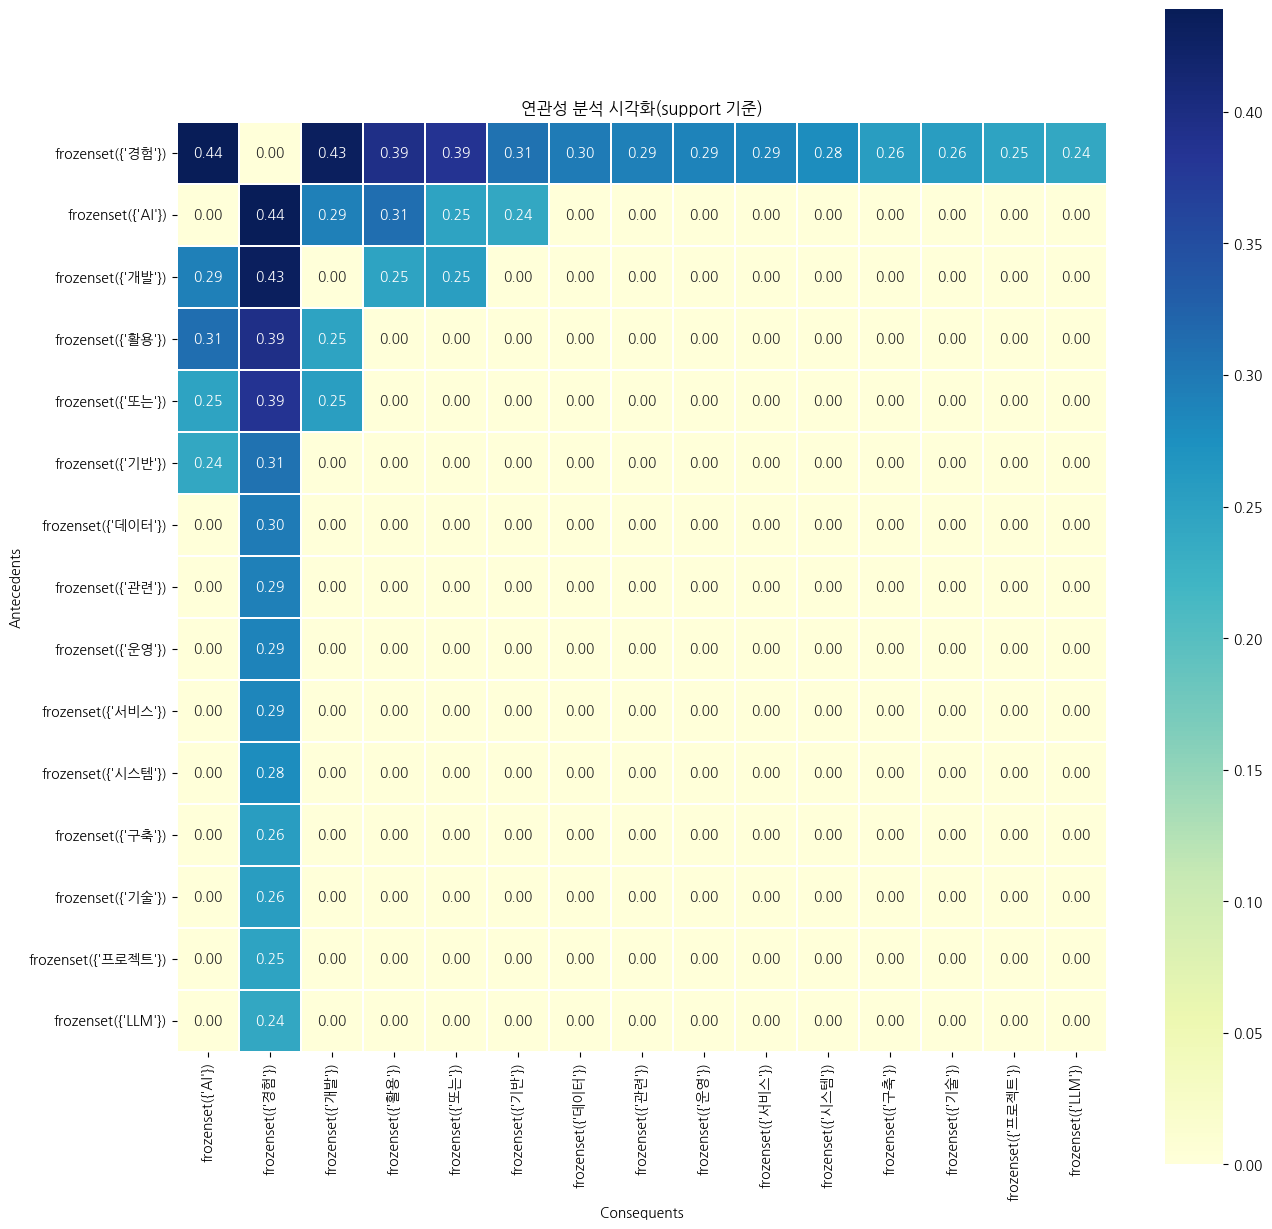

In [98]:
# 히트맵 그리기
pivot_data = rules.sort_values("support", ascending=False).head(40).pivot_table(
    index="antecedents",
    columns="consequents",
    values="support",
    fill_value=0
)
plt.figure(figsize=(15,15))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(support 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

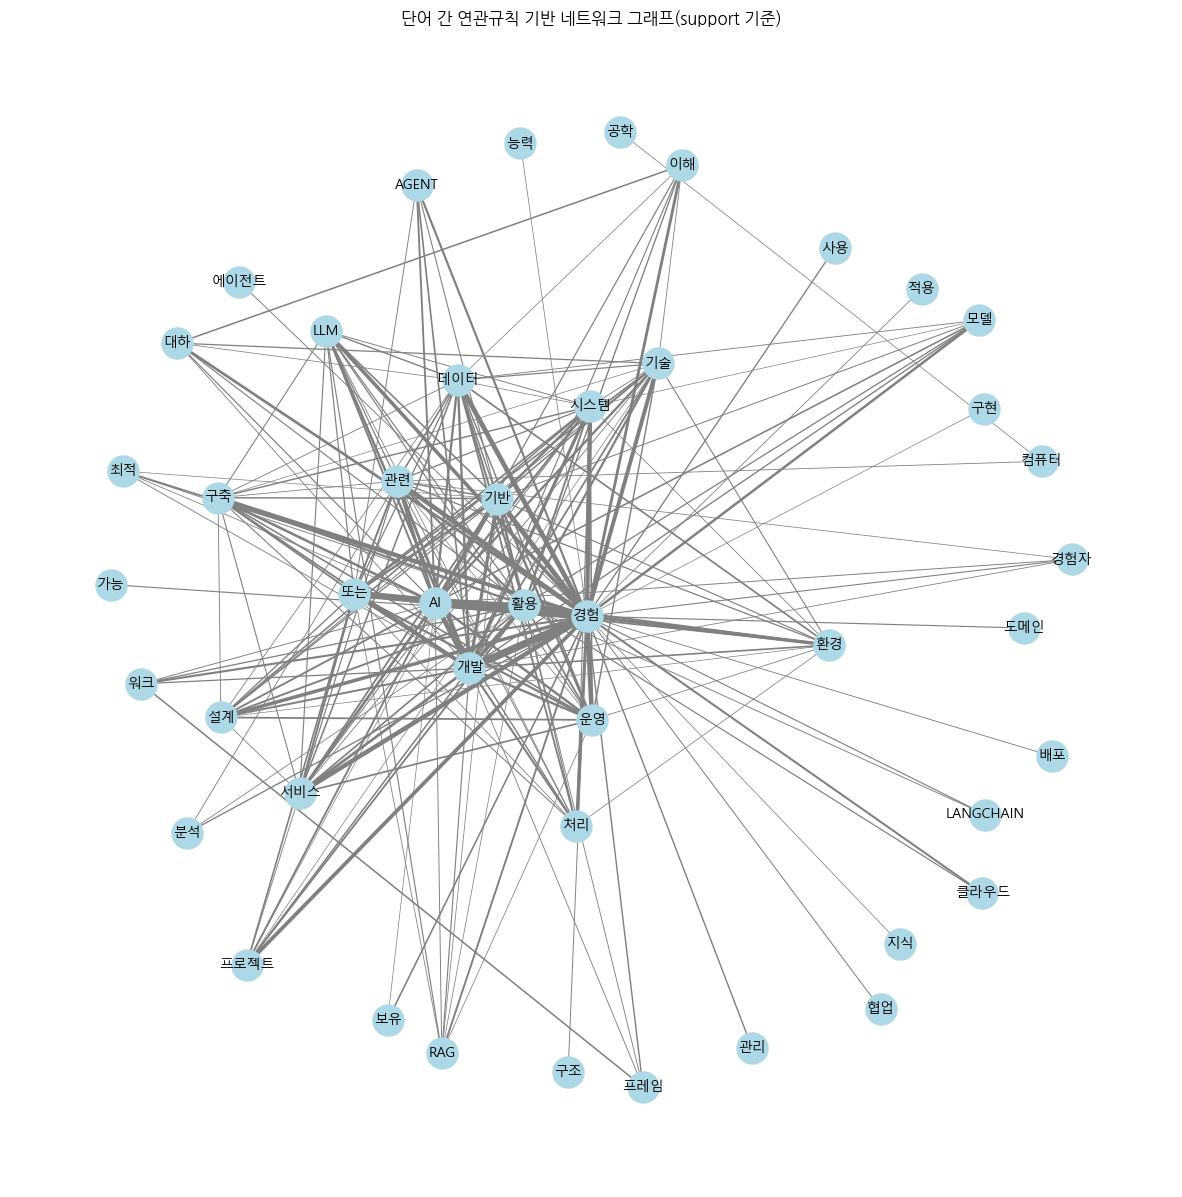

In [147]:
#네트워크 그래프 그리기
# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
## 보여주고 싶은 데이터 설정하기
my_rules = rules.sort_values(by=["support"], ascending=False)

for _ , col_data in my_rules.iterrows():
    # 1) 단어 추출
    antecedent = ",".join(col_data["antecedents"])
    consequent = ",".join(col_data["consequents"])

    # 2) 지표 추출
    weight = col_data["support"]

    # 3) 그래프에 정보 추가
    G.add_edge(antecedent, consequent, weight=weight)

# 3. 노드 배치
# position = nx.kamada_kawai_layout(G)
position = nx.spring_layout(G, k=1.0, seed=1)

# 4. 가중치 추출
scale = 1 # 선의 굵기가 너무 굵다면 사이즈를 줄일수 있습니다
edge_weights = [G[u][v]["weight"]*scale for u, v in G.edges()]
w = np.array(edge_weights, dtype=float)
w_norm = (w - w.min()) / (w.max() - w.min() + 1e-9)   # 0~1
w_scaled  = 0.5 + w_norm * 5

# 5. 그리기
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, position, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, position, edge_color="gray", width=w_scaled)
nx.draw_networkx_labels(G, position, font_size=10, font_family="Malgun Gothic")
plt.title("단어 간 연관규칙 기반 네트워크 그래프(support 기준)")
plt.axis("off")
plt.show()

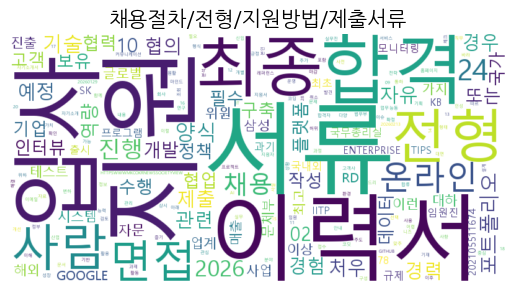

In [100]:
#채용절차/전형/지원방법/제출서류 키워드 분석
remove_list = []    #불필요한 단어리스트
result_list = []    #불필요한 단어 제거된 결과

for respons_text in df["hiring_text"]:
    if pd.isna(respons_text):
        continue
    respons_list = ast.literal_eval(respons_text)

    data_list = []
    for respons_text in respons_list:
        respons_text = respons_text.upper() #대문자화
        if respons_text in remove_list:
            continue
        data_list.append(respons_text)
    data_list = list(set(data_list)) # 중복제거
    result_list.extend(data_list)

counter = Counter(result_list)

wc = WordCloud(
    font_path = r"c:\Windows\Fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.Figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("채용절차/전형/지원방법/제출서류", fontsize=15)
plt.show()

In [151]:
#네트워크 분석을 위한 데이터 만들기
te = TransactionEncoder()

remove_list = ['AI', 'AL','AGENT','에이전트', '개발', '기반', '서비스']    #불필요한 단어리스트
result_list = []    #불필요한 단어 제거된 결과

for respons_text in df["hiring_text"]:
    if pd.isna(respons_text):
        continue
    respons_list = ast.literal_eval(respons_text)

    data_list = []
    for respons_text in respons_list:
        respons_text = respons_text.upper() #대문자화
        if respons_text in remove_list:
            continue
        data_list.append(respons_text)
    data_list = list(set(data_list)) # 중복제거
    result_list.append(data_list)   

te_arr = te.fit(result_list).transform(result_list)

df_arr = pd.DataFrame(te_arr, columns=te.columns_)

frequent_itemsets = apriori(df_arr, min_support=0.003, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.1)


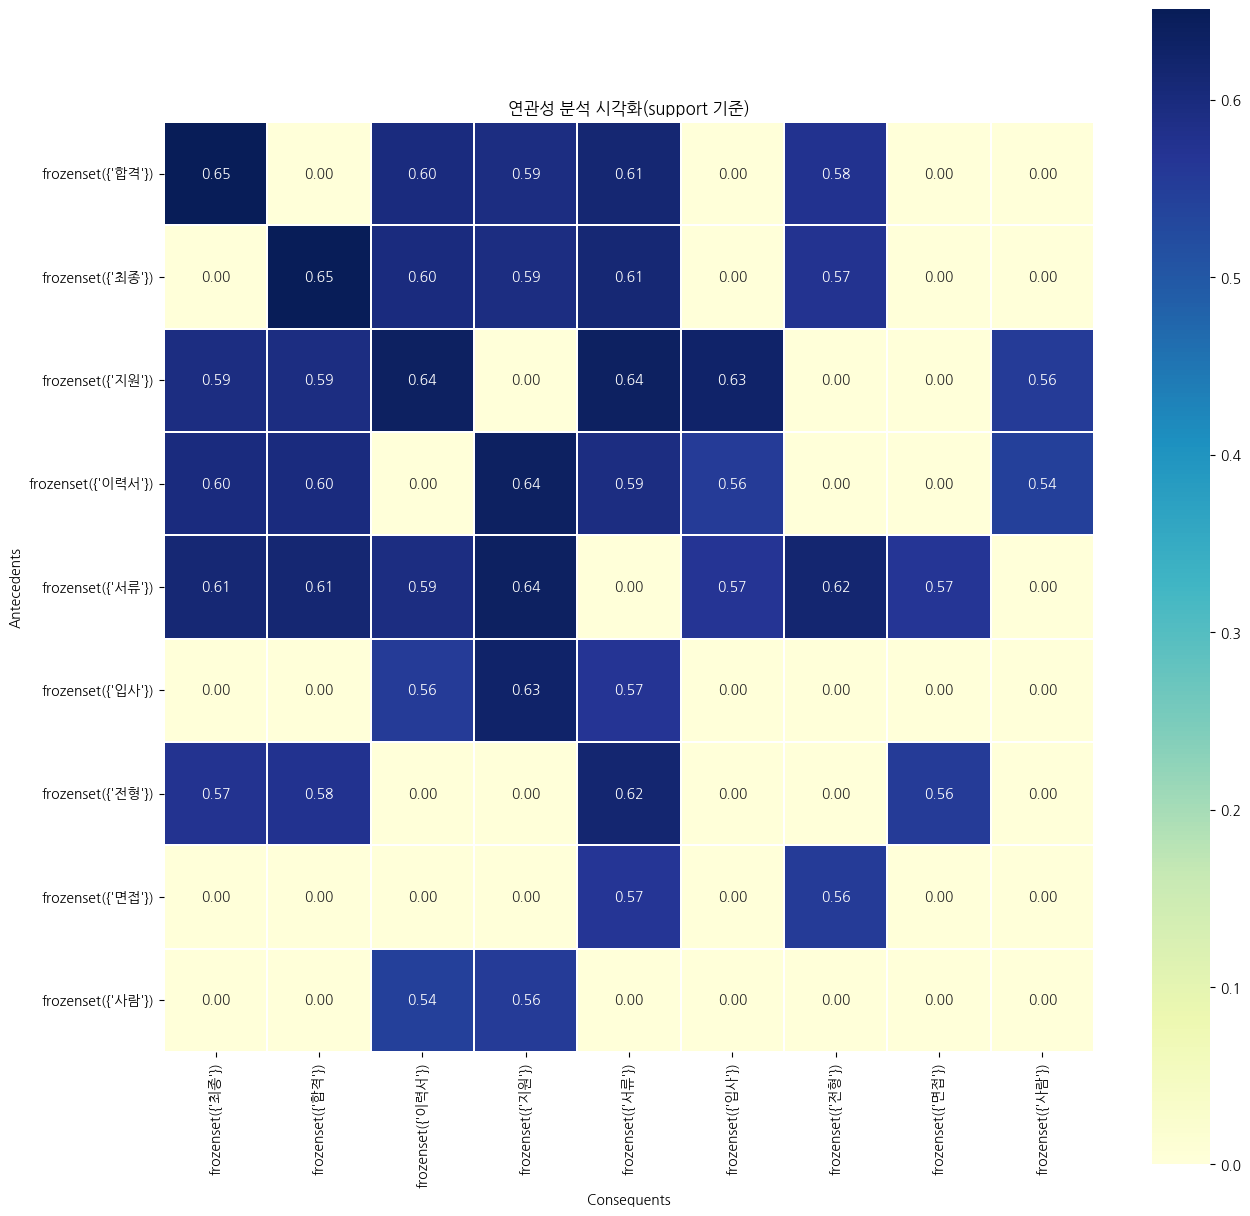

In [102]:
# 히트맵 그리기
pivot_data = rules.sort_values("support", ascending=False).head(40).pivot_table(
    index="antecedents",
    columns="consequents",
    values="support",
    fill_value=0
)
plt.figure(figsize=(15,15))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(support 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

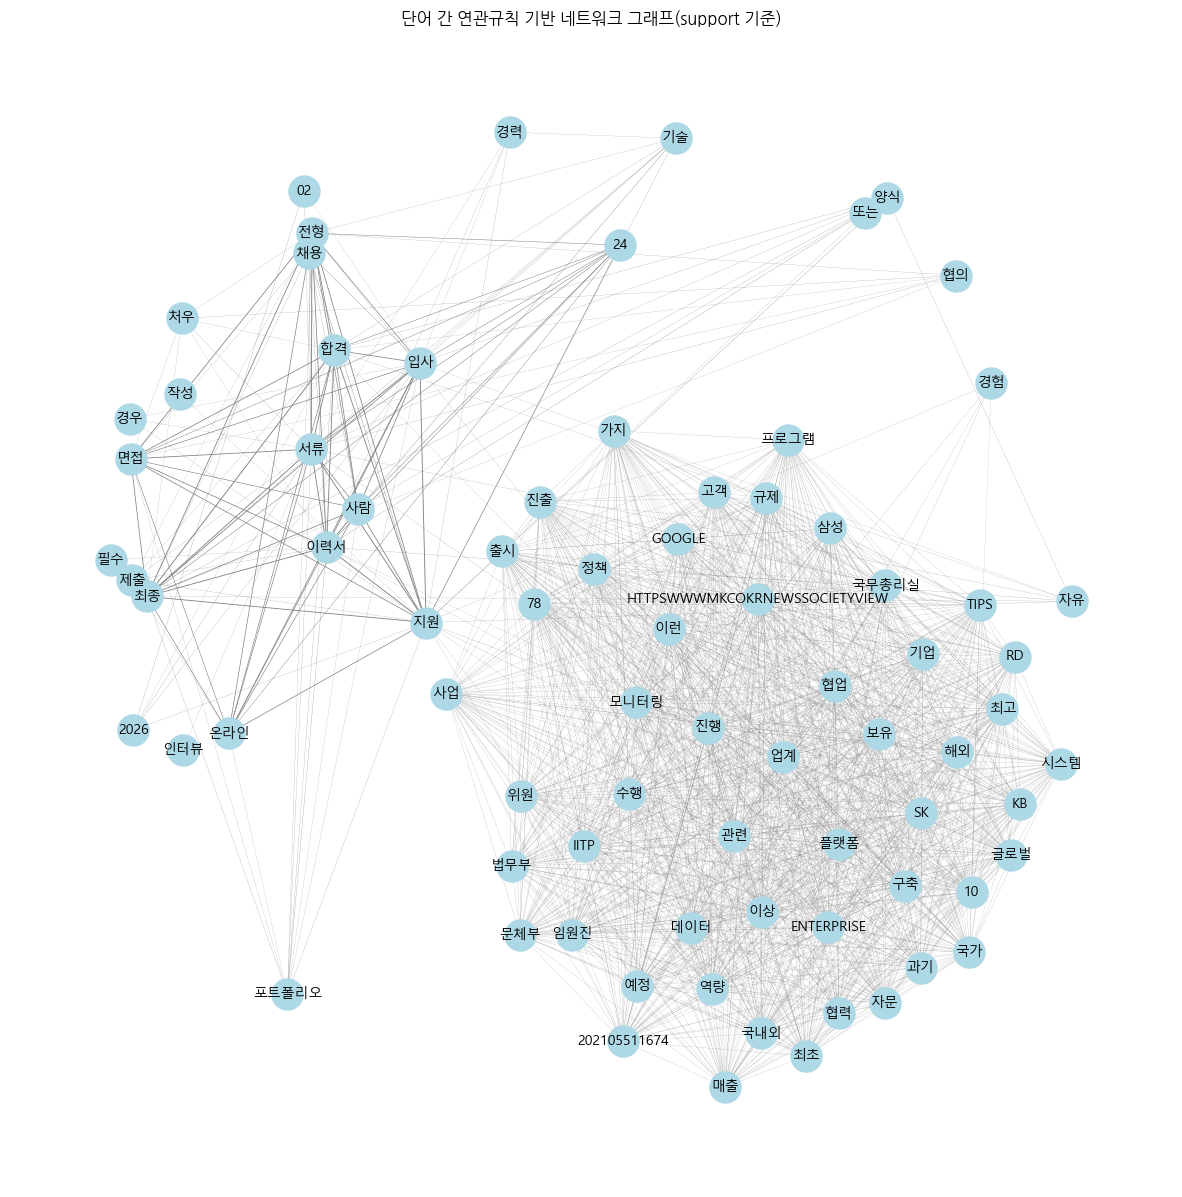

In [152]:
#네트워크 그래프 그리기
# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
## 보여주고 싶은 데이터 설정하기
my_rules = rules.sort_values(by=["support"], ascending=False)

for _ , col_data in my_rules.iterrows():
    # 1) 단어 추출
    antecedent = ",".join(col_data["antecedents"])
    consequent = ",".join(col_data["consequents"])

    # 2) 지표 추출
    weight = col_data["support"]

    # 3) 그래프에 정보 추가
    G.add_edge(antecedent, consequent, weight=weight)

# 3. 노드 배치
# position = nx.kamada_kawai_layout(G)
position = nx.spring_layout(G, k=1.0, seed=1)

# 4. 가중치 추출
scale = 1 # 선의 굵기가 너무 굵다면 사이즈를 줄일수 있습니다
edge_weights = [G[u][v]["weight"]*scale for u, v in G.edges()]
w = np.array(edge_weights, dtype=float)
w_norm = (w - w.min()) / (w.max() - w.min() + 1e-9)   # 0~1
w_scaled  = 0.5 + w_norm * 5

# 5. 그리기
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, position, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, position, edge_color="gray", width=edge_weights)
nx.draw_networkx_labels(G, position, font_size=10, font_family="Malgun Gothic")
plt.title("단어 간 연관규칙 기반 네트워크 그래프(support 기준)")
plt.axis("off")
plt.show()

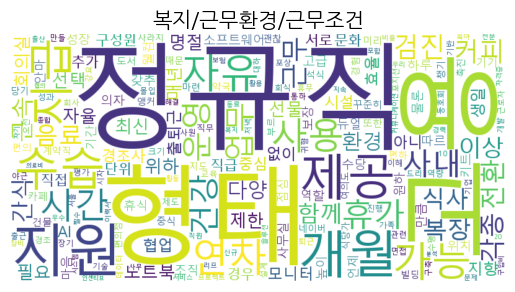

In [104]:
#복지/근무환경/근무조건 키워드 분석
remove_list = []    #불필요한 단어리스트
result_list = []    #불필요한 단어 제거된 결과

for respons_text in df["benefits_text"]:
    if pd.isna(respons_text):
        continue
    respons_list = ast.literal_eval(respons_text)

    data_list = []
    for respons_text in respons_list:
        respons_text = respons_text.upper() #대문자화
        if respons_text in remove_list:
            continue
        data_list.append(respons_text)
    data_list = list(set(data_list)) # 중복제거
    result_list.extend(data_list)

counter = Counter(result_list)

wc = WordCloud(
    font_path = r"c:\Windows\Fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.Figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("복지/근무환경/근무조건", fontsize=15)
plt.show()

In [154]:
#네트워크 분석을 위한 데이터 만들기
te = TransactionEncoder()

remove_list = ['AI', 'AL','AGENT','에이전트', '개발', '기반', '서비스']    #불필요한 단어리스트
result_list = []    #불필요한 단어 제거된 결과

for respons_text in df["benefits_text"]:
    if pd.isna(respons_text):
        continue
    respons_list = ast.literal_eval(respons_text)

    data_list = []
    for respons_text in respons_list:
        respons_text = respons_text.upper() #대문자화
        if respons_text in remove_list:
            continue
        data_list.append(respons_text)
    data_list = list(set(data_list)) # 중복제거
    result_list.append(data_list)   

te_arr = te.fit(result_list).transform(result_list)

df_arr = pd.DataFrame(te_arr, columns=te.columns_)

frequent_itemsets = apriori(df_arr, min_support=0.003, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.1)


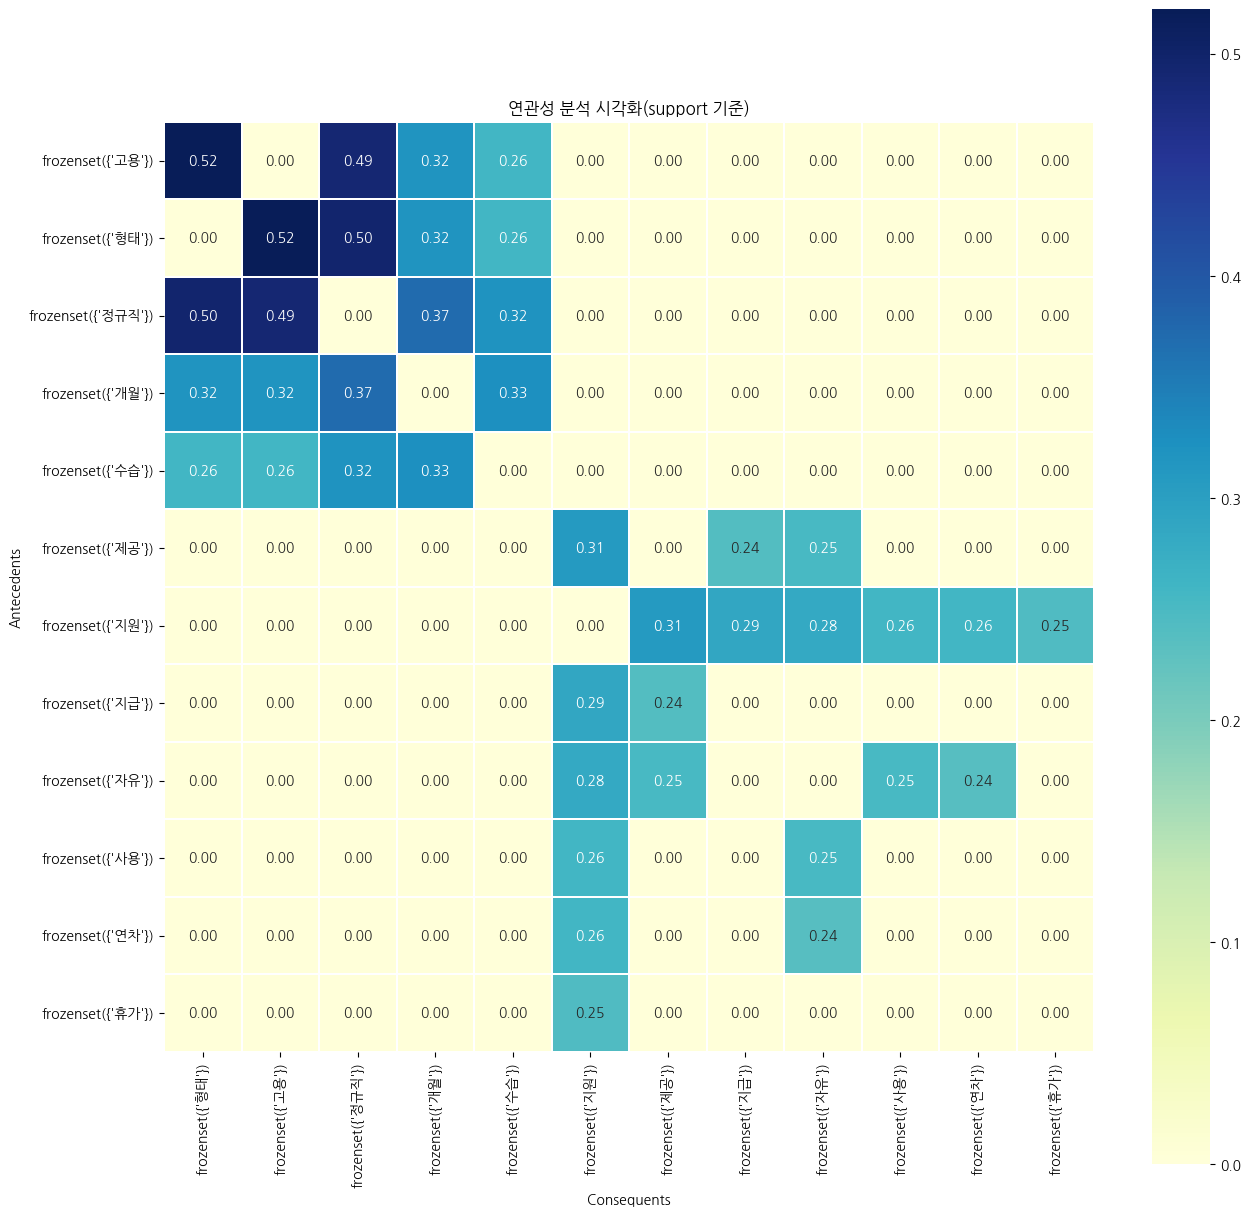

In [106]:
# 히트맵 그리기
pivot_data = rules.sort_values("support", ascending=False).head(40).pivot_table(
    index="antecedents",
    columns="consequents",
    values="support",
    fill_value=0
)
plt.figure(figsize=(15,15))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(support 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

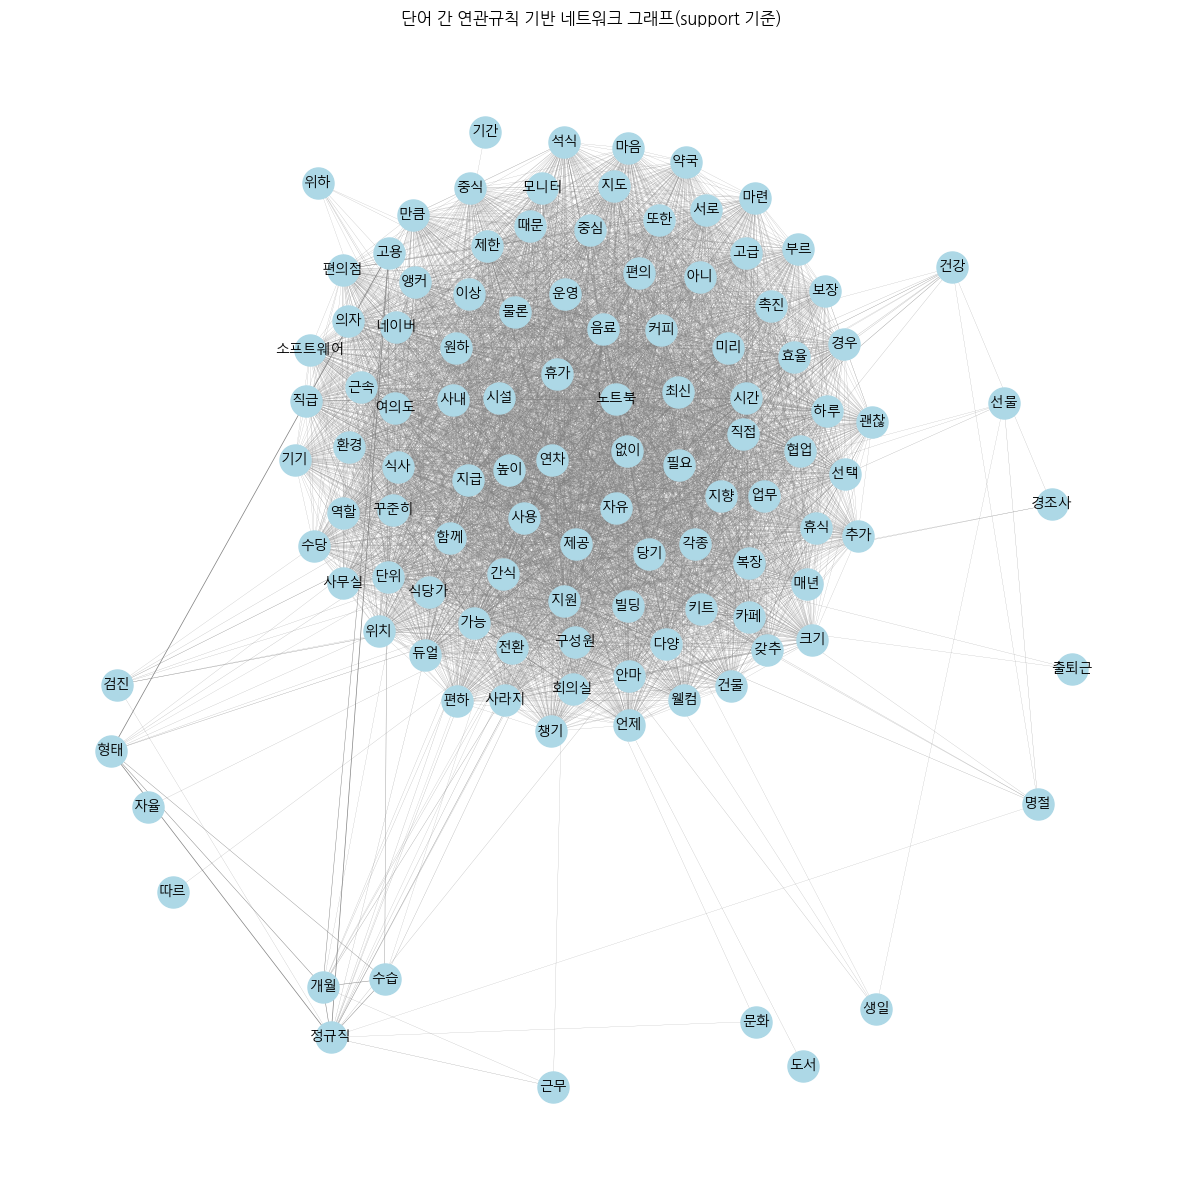

In [155]:
#네트워크 그래프 그리기
# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
## 보여주고 싶은 데이터 설정하기
my_rules = rules.sort_values(by=["support"], ascending=False)

for _ , col_data in my_rules.iterrows():
    # 1) 단어 추출
    antecedent = ",".join(col_data["antecedents"])
    consequent = ",".join(col_data["consequents"])

    # 2) 지표 추출
    weight = col_data["support"]

    # 3) 그래프에 정보 추가
    G.add_edge(antecedent, consequent, weight=weight)

# 3. 노드 배치
# position = nx.kamada_kawai_layout(G)
position = nx.spring_layout(G, k=1.0, seed=1)

# 4. 가중치 추출
scale = 1 # 선의 굵기가 너무 굵다면 사이즈를 줄일수 있습니다
edge_weights = [G[u][v]["weight"]*scale for u, v in G.edges()]
w = np.array(edge_weights, dtype=float)
w_norm = (w - w.min()) / (w.max() - w.min() + 1e-9)   # 0~1
w_scaled  = 0.5 + w_norm * 5

# 5. 그리기
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, position, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, position, edge_color="gray", width=edge_weights)
nx.draw_networkx_labels(G, position, font_size=10, font_family="Malgun Gothic")
plt.title("단어 간 연관규칙 기반 네트워크 그래프(support 기준)")
plt.axis("off")
plt.show()

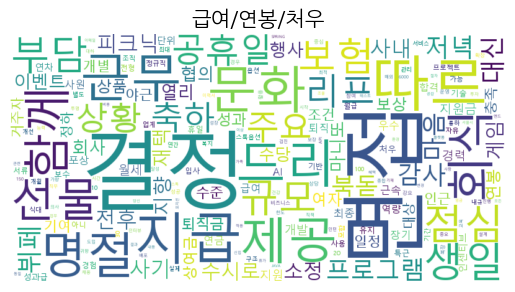

In [108]:
#급여/연봉/처우 키워드 분석
remove_list = []    #불필요한 단어리스트
result_list = []    #불필요한 단어 제거된 결과

for respons_text in df["salary_text"]:
    if pd.isna(respons_text):
        continue
    respons_list = ast.literal_eval(respons_text)

    data_list = []
    for respons_text in respons_list:
        respons_text = respons_text.upper() #대문자화
        if respons_text in remove_list:
            continue
        data_list.append(respons_text)
    data_list = list(set(data_list)) # 중복제거
    result_list.extend(data_list)

counter = Counter(result_list)

wc = WordCloud(
    font_path = r"c:\Windows\Fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.Figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("급여/연봉/처우", fontsize=15)
plt.show()

In [157]:
#네트워크 분석을 위한 데이터 만들기
te = TransactionEncoder()

remove_list = ['AI', 'AL','AGENT','에이전트', '개발', '기반', '서비스']    #불필요한 단어리스트
result_list = []    #불필요한 단어 제거된 결과

for respons_text in df["salary_text"]:
    if pd.isna(respons_text):
        continue
    respons_list = ast.literal_eval(respons_text)

    data_list = []
    for respons_text in respons_list:
        respons_text = respons_text.upper() #대문자화
        if respons_text in remove_list:
            continue
        data_list.append(respons_text)
    data_list = list(set(data_list)) # 중복제거
    result_list.append(data_list)   

te_arr = te.fit(result_list).transform(result_list)

df_arr = pd.DataFrame(te_arr, columns=te.columns_)

frequent_itemsets = apriori(df_arr, min_support=0.003, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.1)


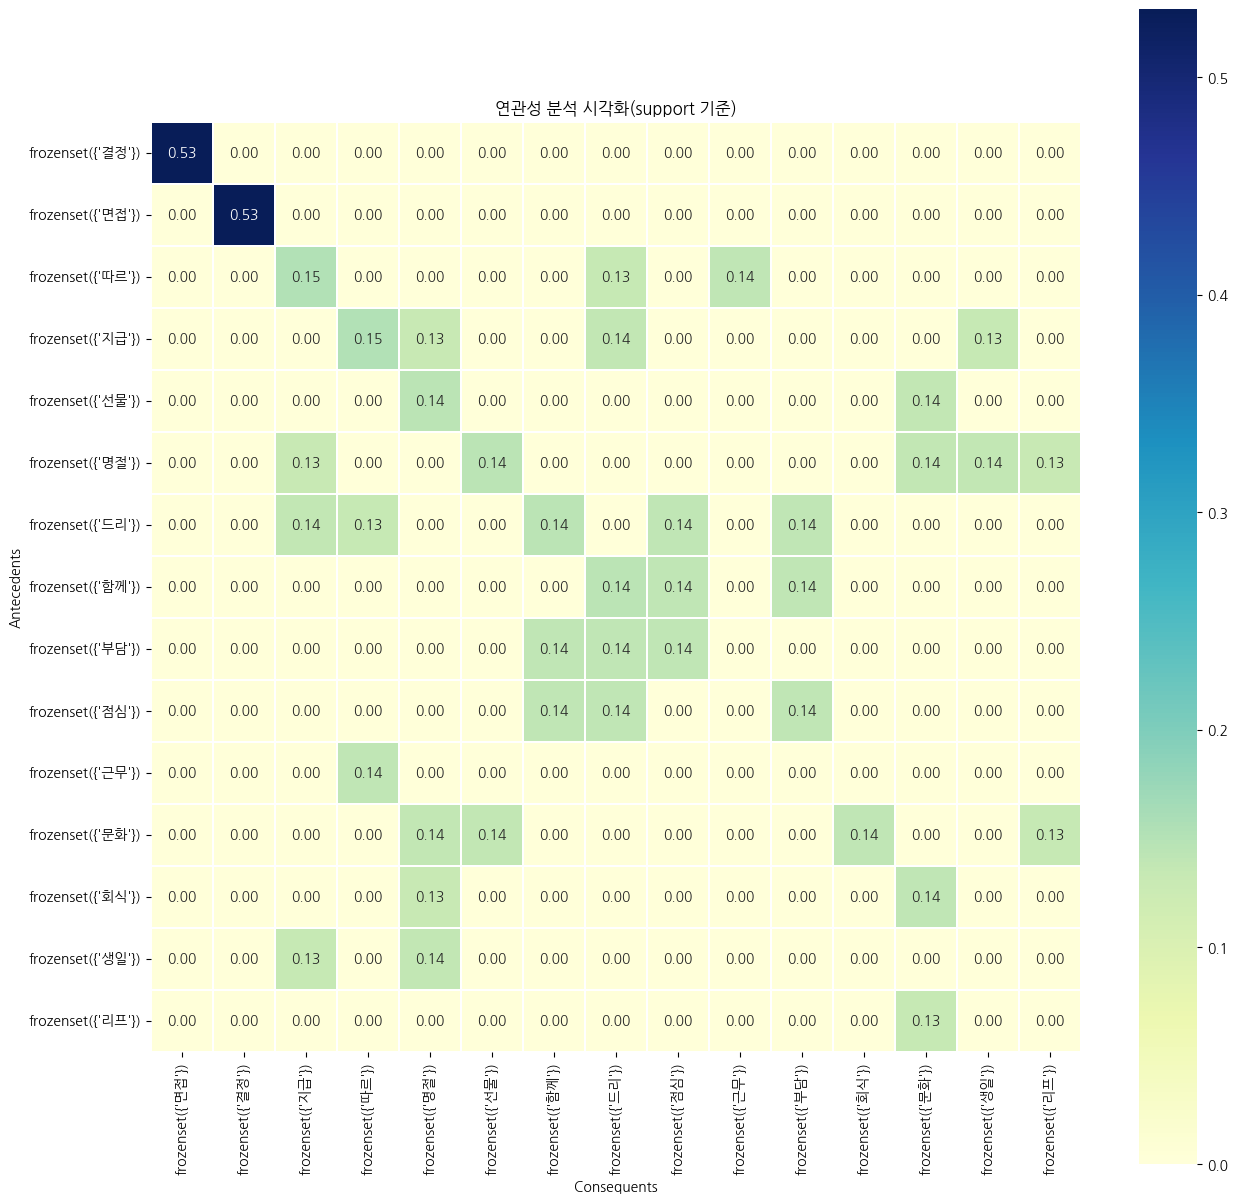

In [110]:
# 히트맵 그리기
pivot_data = rules.sort_values("support", ascending=False).head(40).pivot_table(
    index="antecedents",
    columns="consequents",
    values="support",
    fill_value=0
)
plt.figure(figsize=(15,15))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(support 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()
    

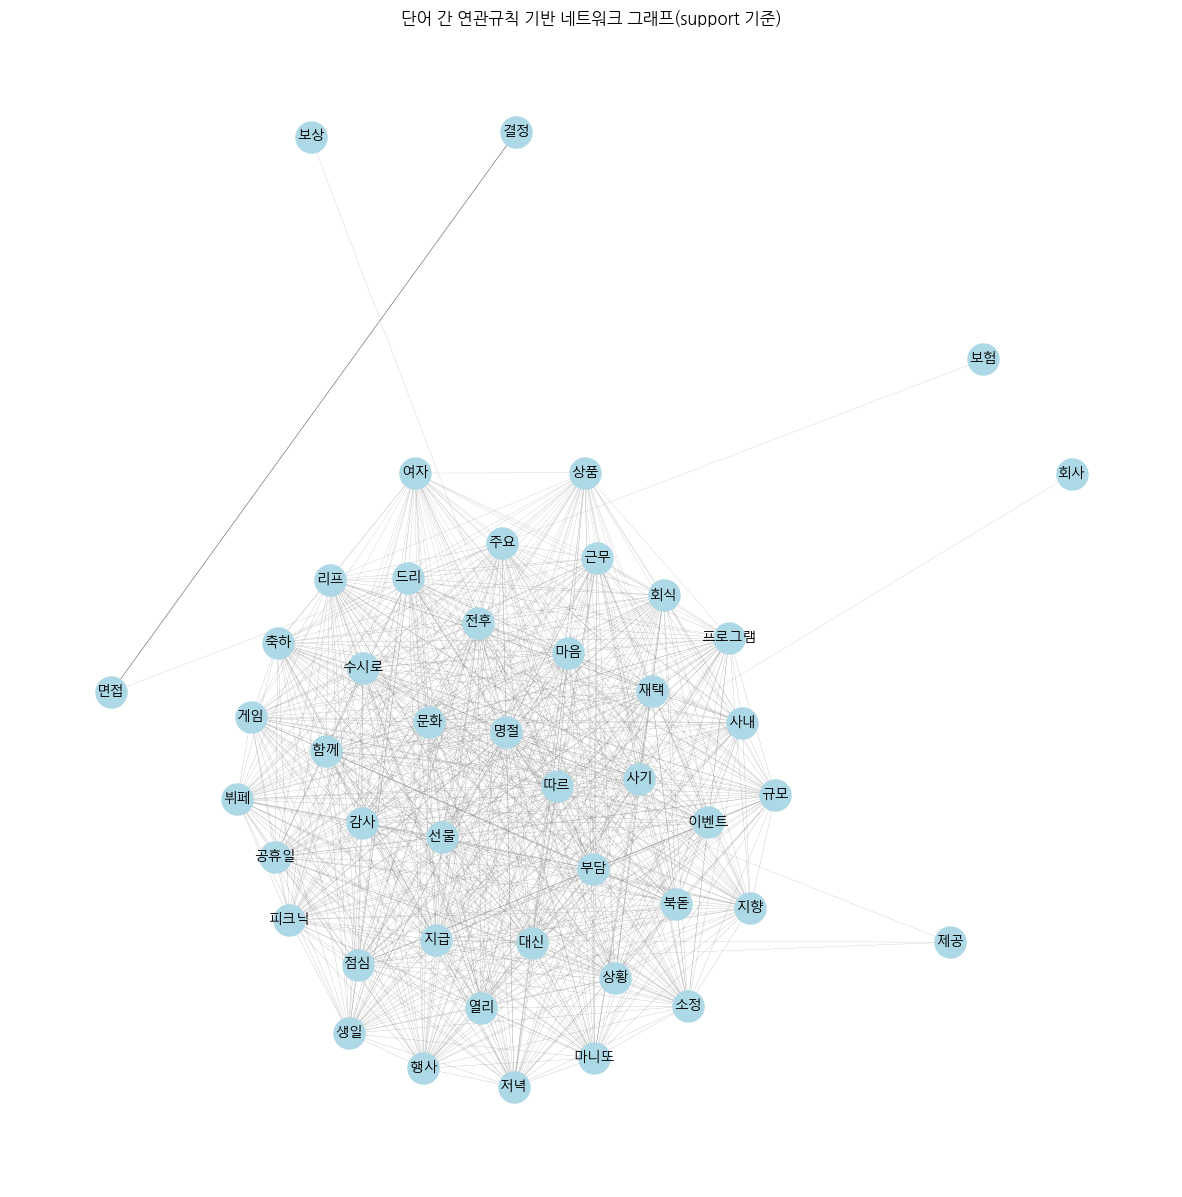

In [158]:
#네트워크 그래프 그리기
# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
## 보여주고 싶은 데이터 설정하기
my_rules = rules.sort_values(by=["support"], ascending=False)

for _ , col_data in my_rules.iterrows():
    # 1) 단어 추출
    antecedent = ",".join(col_data["antecedents"])
    consequent = ",".join(col_data["consequents"])

    # 2) 지표 추출
    weight = col_data["support"]

    # 3) 그래프에 정보 추가
    G.add_edge(antecedent, consequent, weight=weight)

# 3. 노드 배치
# position = nx.kamada_kawai_layout(G)
position = nx.spring_layout(G, k=1.0, seed=1)

# 4. 가중치 추출
scale = 1 # 선의 굵기가 너무 굵다면 사이즈를 줄일수 있습니다
edge_weights = [G[u][v]["weight"]*scale for u, v in G.edges()]
w = np.array(edge_weights, dtype=float)
w_norm = (w - w.min()) / (w.max() - w.min() + 1e-9)   # 0~1
w_scaled  = 0.5 + w_norm * 5

# 5. 그리기
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, position, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, position, edge_color="gray", width=edge_weights)
nx.draw_networkx_labels(G, position, font_size=10, font_family="Malgun Gothic")
plt.title("단어 간 연관규칙 기반 네트워크 그래프(support 기준)")
plt.axis("off")
plt.show()